# Intro

This project is designed to analyze the biodiversity in some major National Parks based around data on observations.

The project will seek to asnwer the following questions:
 - Which group of animals has the highest number of endangered species?
 - Do some groups have a higher percentage of endangered species than others?
 - Which bird is most prevelant and how are their observations distributed between the documented parks?
 
**Data sources**
 
Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

## Loading the Data

Below I imported the data using `pandas` 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [2]:
observations = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')

**species_info**

The `species_info` db included the following columns:
- `category`: The taxonomical category for each species
- `scientific_name`: The scientific name for each species
- `common_names`: The common names for the species
- `conservation_status`: The conservation status for each species

We can also see the different categories that were included in the database:
- `Mammal`
- `Bird`
- `Reptile`
- `Amphibian`
- `Fish`
- `Vascular Plant`
- `Nonvascular Plant`

In [3]:
print(species_info.head())
print(species_info.category.unique())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


Next we take a look at the `observations` database.

`observations` contains the following columns:
- `scientific_name`: The scientific name for each species
- `park_name`: The name of the park where the observations took place
- `observations`: How many observations of the species were taken during the time period

Below the `observations` table we see the names of the parks that are included:
- `Great Smokey Mountains National Park`
- `Yosemite National Park`
- `Bryce National Park`
- `Yellowstone National Park`

In [4]:
print(observations.head())
print(observations.park_name.unique())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


First we will look at information from the `species_info` database. 

Here we see what the various levels of `conservation_status`:
- `nan`
- `Species of Concern`
- `Endangered`
- `Threatened`
- `In Recovery`

In [5]:
print(species_info.conservation_status.unique())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


There are null values present in the `conservation_status` column. Since those represent species that are not endangered, they have been replaced with `Not Endangered`

To make future calculations easier we will also add the columnd `is_endangered` to give a binary indicator if the species is endangered or not.

In [6]:
species_info.conservation_status = species_info.conservation_status.fillna('Not Endangered')
species_info['is_endangered'] = species_info.conservation_status != 'Not Endangered'

Next, this project will focus on animal species, so a new database, `animals`, is created by removing the plant species.


In [7]:
animals = species_info[(species_info.category != 'Vascular Plant') & (species_info.category != 'Nonvascular Plant')]
animals.head()

,category,scientific_name,common_names,conservation_status,is_endangered
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not Endangered,False
1,Mammal,Bos bison,"American Bison, Bison",Not Endangered,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not Endangered,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Not Endangered,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,Not Endangered,False


## Analysis

### Endangered Species

In order to simply looking at the various animal categories, a database is created for each category.

A list of databases and a title for each is then made.

In [8]:
mammals = animals[animals.category == 'Mammal']
birds = animals[animals.category == 'Bird']
reptiles = animals[animals.category == 'Reptile']
amphibians = animals[animals.category == 'Amphibian']
fish = animals[animals.category == 'Fish']

categories = [[animals, 'Animals'], [mammals, 'Mammals'], [birds, 'Birds'], [reptiles, 'Reptiles'], [amphibians, 'Amphibians'], [fish, 'Fish']]

Next we create a look to discover the following calculations:
- How many species are in each category?
- What percentage of animals are endangered in each category?
- What percentage of endangered animals fall into each level of `conservation_status`?

In [9]:
for category in categories:
    length = len(category[0])
    total = len(category[0][category[0].conservation_status != 'Not Endangered'])
    concern = len(category[0][category[0].conservation_status == 'Species of Concern'])
    endangered = len(category[0][category[0].conservation_status == 'Endangered'])
    threatened = len(category[0][category[0].conservation_status =='Threatened'])
    recovery = len(category[0][category[0].conservation_status == 'In Recovery'])
    print(f'''
    {category[1]} have: 
     - {length} total species
     - {round(total/length * 100, 2)}% ({total}) categorized as some form of Endangered
     - {round(concern/length * 100, 2)}% ({concern}) categorized as "Species of Concern"
     - {round(endangered/length * 100, 2)}% ({endangered}) categorized as "Endangered"
     - {round(threatened/length * 100, 2)}% ({threatened}) categorized as "Threatened"
     - {round(recovery/length * 100, 2)}% ({recovery}) categorized as "In Recovery"
     ''')


    Animals have: 
     - 1021 total species
     - 13.71% (140) categorized as some form of Endangered
     - 11.07% (113) categorized as "Species of Concern"
     - 1.47% (15) categorized as "Endangered"
     - 0.78% (8) categorized as "Threatened"
     - 0.39% (4) categorized as "In Recovery"
     

    Mammals have: 
     - 214 total species
     - 17.76% (38) categorized as some form of Endangered
     - 13.08% (28) categorized as "Species of Concern"
     - 3.27% (7) categorized as "Endangered"
     - 0.93% (2) categorized as "Threatened"
     - 0.47% (1) categorized as "In Recovery"
     

    Birds have: 
     - 521 total species
     - 15.16% (79) categorized as some form of Endangered
     - 13.82% (72) categorized as "Species of Concern"
     - 0.77% (4) categorized as "Endangered"
     - 0.0% (0) categorized as "Threatened"
     - 0.58% (3) categorized as "In Recovery"
     

    Reptiles have: 
     - 79 total species
     - 6.33% (5) categorized as some form of Endangere

This data shows us the following:
- `Mammals` have the **highest percentage** of endangered animals at `17.76%`
- `Birds` have the **most** endangered species at `79`
- `Reptiles` have the **lowest percentage** and **total** endangered species at `6.63%` and `5`
- `Mammals` and `Birds` have a **higher than average** percentage of endangered species. (above 13%)
- `Reptiles`, `Amphibians`, and `Fish` have a **lower than average** percentage of endangered species (below 13%)

The next step is to discover if the difference between the **higher percentage** are statistically significantly different the the **lower percentage** categories. This is done using a chi_2 test. 

The tests are as followed:
- `contingency1` is between `Birds` and `Amphibians`
- `contingency2` is between `Mammals` and `Amphibians`
- `contingency3` is between `Mammals` and `Reptiles`


In [10]:
from scipy.stats import chi2_contingency

contingency1 = [[521 - 79, 79], 
                [80 - 7, 7]]
chi2, pval1, dof, expected = chi2_contingency(contingency1)
print(f'Birds and Amphibians pval: {pval1}')

contingency2 = [[214 - 38, 38], 
                [80 - 7, 7]]
chi2, pval2, dof, expected = chi2_contingency(contingency2)
print(f'Mammals and Amphibians pval: {pval2}')

contingency3 = [[214 - 38, 38], 
                [79 - 5, 5]]
chi2, pval3, dof, expected = chi2_contingency(contingency3)
print(f'Mammals and Reptiles pval: {pval3}')




Birds and Amphibians pval: 0.1758277976037415
Mammals and Amphibians pval: 0.08416928847464508
Mammals and Reptiles pval: 0.02338465214871547


In order for there to be a statistically significant difference the p-values need to be below **0.05**. Our data shows that only `Mammals` and `Reptiles` were statistically different. 

### Bird Observations

In order to find which bird is most prevelent, a new database, `birds_merged`, is created by merging the `birds` db, and the `observations` db.

In [11]:
birds_merged = pd.merge(birds, observations, how='left', on='scientific_name')

print(birds_merged.head())

  category                scientific_name        common_names  \
0     Bird  Vermivora pinus X chrysoptera  Brewster's Warbler   
1     Bird  Vermivora pinus X chrysoptera  Brewster's Warbler   
2     Bird  Vermivora pinus X chrysoptera  Brewster's Warbler   
3     Bird  Vermivora pinus X chrysoptera  Brewster's Warbler   
4     Bird             Accipiter cooperii       Cooper's Hawk   

  conservation_status  is_endangered                            park_name  \
0      Not Endangered          False  Great Smoky Mountains National Park   
1      Not Endangered          False               Yosemite National Park   
2      Not Endangered          False            Yellowstone National Park   
3      Not Endangered          False                  Bryce National Park   
4  Species of Concern           True                  Bryce National Park   

   observations  
0            98  
1           136  
2           259  
3            89  
4            95  


Next, a list of each common name is for each row in `birds_merged`.

In [12]:
def remove_punctuation(string):
    lst = []
    for word in string.split(" "):
        word.replace('\w', "")
        lst.append(word)
    return " ".join(lst)

names_full = birds_merged\
    .common_names\
    .apply(remove_punctuation)\
    .str.split().tolist()

print(names_full[:5])

[["Brewster's", 'Warbler'], ["Brewster's", 'Warbler'], ["Brewster's", 'Warbler'], ["Brewster's", 'Warbler'], ["Cooper's", 'Hawk']]


No those lists are combined into one list with every instance of a name that appears.

In [13]:
names_filtered = []

for lst in names_full:
    for word in lst:
        names_filtered.append(word)
            
print(names_filtered[:5])

["Brewster's", 'Warbler', "Brewster's", 'Warbler', "Brewster's"]


Finally, a count is taken of every word that appears to find the most common occurance. 

In [14]:
words_counted = []

for i in names_filtered:
    x = names_filtered.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(15)

,Word,Count
89,Warbler,236
147,Sparrow,124
86,Northern,116
348,Common,96
56,American,92
324,Flycatcher,80
7,Owl,76
461,Western,68
304,Great,68
291,Gray,60


Here we see that the name **Warbler** occurs most often. 

Now a new column is added to `birds_merged`, **is_warbler** to identify if the common name includes the word **Warbler** in it.

Afterwards, the database `warblers` is created by only adding species where **is_warbler** is true.

In [15]:
birds_merged['is_warbler'] = birds_merged.common_names.str.contains(r"\bWarbler\b", regex=True)
birds_merged.head()

,category,scientific_name,common_names,conservation_status,is_endangered,park_name,observations,is_warbler
0,Bird,Vermivora pinus X chrysoptera,Brewster's Warbler,Not Endangered,False,Great Smoky Mountains National Park,98,True
1,Bird,Vermivora pinus X chrysoptera,Brewster's Warbler,Not Endangered,False,Yosemite National Park,136,True
2,Bird,Vermivora pinus X chrysoptera,Brewster's Warbler,Not Endangered,False,Yellowstone National Park,259,True
3,Bird,Vermivora pinus X chrysoptera,Brewster's Warbler,Not Endangered,False,Bryce National Park,89,True
4,Bird,Accipiter cooperii,Cooper's Hawk,Species of Concern,True,Bryce National Park,95,False


In [16]:
warblers = birds_merged[birds_merged.is_warbler]
print(warblers.head())

    category                scientific_name                 common_names  \
0       Bird  Vermivora pinus X chrysoptera           Brewster's Warbler   
1       Bird  Vermivora pinus X chrysoptera           Brewster's Warbler   
2       Bird  Vermivora pinus X chrysoptera           Brewster's Warbler   
3       Bird  Vermivora pinus X chrysoptera           Brewster's Warbler   
680     Bird         Dendroica caerulescens  Black-Throated Blue Warbler   

    conservation_status  is_endangered                            park_name  \
0        Not Endangered          False  Great Smoky Mountains National Park   
1        Not Endangered          False               Yosemite National Park   
2        Not Endangered          False            Yellowstone National Park   
3        Not Endangered          False                  Bryce National Park   
680      Not Endangered          False                  Bryce National Park   

     observations  is_warbler  
0              98        True  
1   

In order to organize the information into the various National Parks, the database `by_park` is created by grouping `warblers` by the column **park_name** and **is_endangered** 

Once that is done, a bar chart is created to visualize the data and a statement is printed giving the percentage of endangered warblers observed in the parks.

In [17]:
by_park = warblers.groupby(['park_name', 'is_endangered']).observations.sum().reset_index()
print(by_park)

                             park_name  is_endangered  observations
0                  Bryce National Park          False          5565
1                  Bryce National Park           True           195
2  Great Smoky Mountains National Park          False          4290
3  Great Smoky Mountains National Park           True           145
4            Yellowstone National Park          False         13995
5            Yellowstone National Park           True           492
6               Yosemite National Park          False          8441
7               Yosemite National Park           True           271


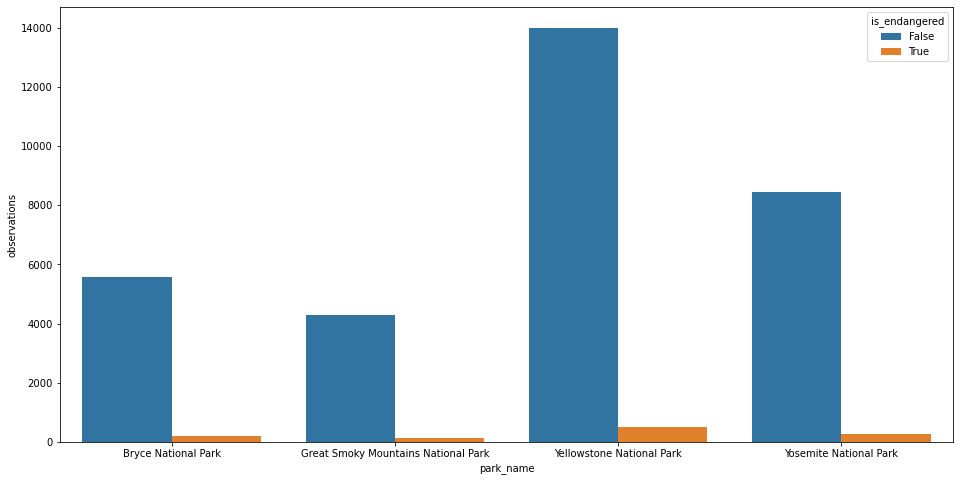

In [18]:
plt.figure(figsize=(16, 8))
sns.barplot(data=by_park, x='park_name', y='observations', hue='is_endangered')
plt.show()

In [19]:
parks = ['Bryce National Park', 'Great Smoky Mountains National Park', 'Yellowstone National Park', 'Yosemite National Park']

for park in parks:
    park_db = by_park[by_park.park_name == park]
    total = park_db.observations.sum()
    per = round((park_db.loc[park_db.is_endangered].observations.sum() / total), 2)
    print(f"""
    {int(per * 100)}% of warbler observations in '{park}' are of endengered species 
    """)


    3% of warbler observations in 'Bryce National Park' are of endengered species 
    

    3% of warbler observations in 'Great Smoky Mountains National Park' are of endengered species 
    

    3% of warbler observations in 'Yellowstone National Park' are of endengered species 
    

    3% of warbler observations in 'Yosemite National Park' are of endengered species 
    


Here we see that every park has a 3% endangered warbler observation percentage.

## Conclusion

The data has answered our quesitons in the following way:
 - Which group of animals has the highest number of endangered species?
     - birds have the highest number
     - mammals have the highest percentage
 - Do some groups have a higher percentage of endangered species than others?
     - birds and mammals have a higher percentage than the others
 - Which bird is most prevelant and how are their observations distributed between the documented parks?
     - Warblers are the most prevelant
     - Each park had a 3% endangered observation percentage